In [1]:
import numpy as np
import sklearn.datasets as dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from machine_learning.supervised_learning.multilayer_perceptron import MLP
from machine_learning.utils import *
import matplotlib.pyplot as plt

In [2]:
digits = dataset.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, shuffle=False)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y_train.reshape(len(y_train), 1)
y_train = onehot_encoder.fit_transform(integer_encoded)

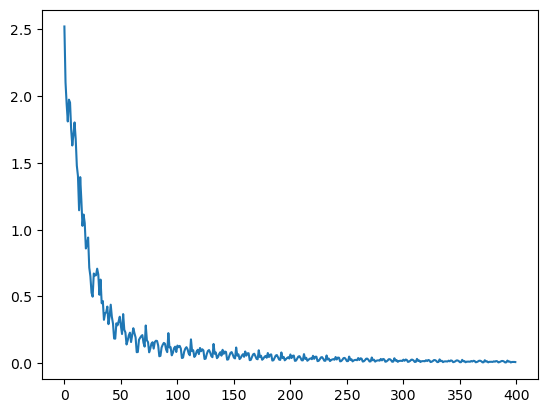


------------------
Dense: 64 -> 25, # params: 1625
Dense: 25 -> 10, # params: 260
------------------


In [3]:
mlp = MLP(regularization=L1(0), optimizer=Adam(learning_rate=0.01), loss=CrossEntropy())
mlp.add(Dense(64, 25))
mlp.add(ReLU())
mlp.add(BatchNormalization(25))
mlp.add(Dense(25, 10))
mlp.add(Softmax())

epochs = 20
loss = mlp.train(X_train, y_train, epochs,)

# Plot loss
plt.plot(loss)
plt.show()

mlp.summary()

y_hat = mlp.predict(X_test)

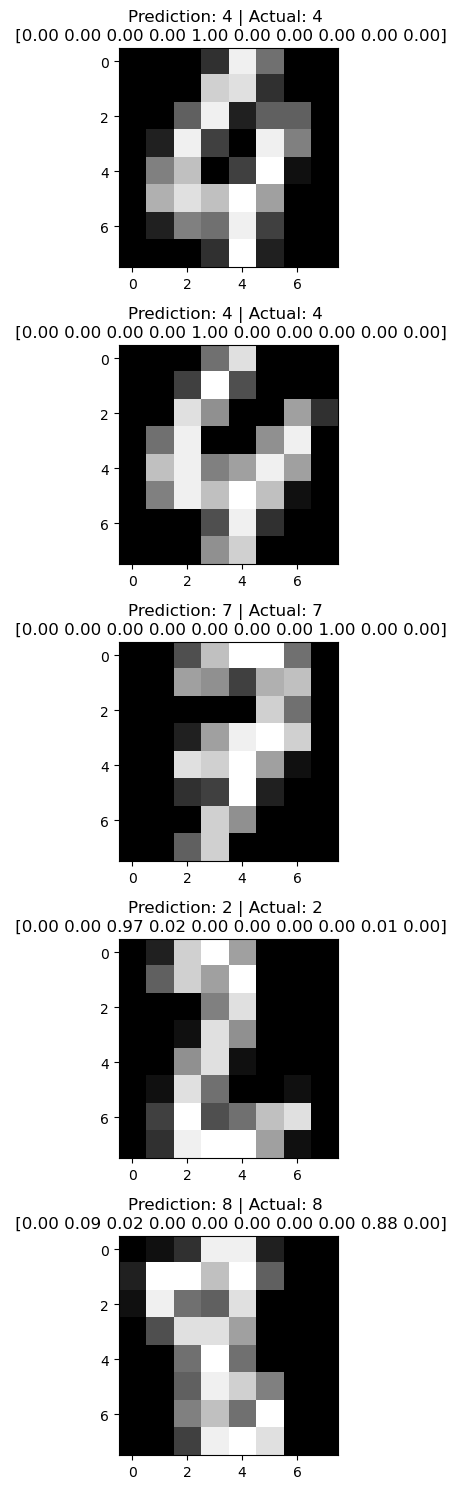

In [4]:
fig, ax = plt.subplots(5, 1, figsize=(10, 15))
# plot some images
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
for i in range(0,5):
    j = i + 10
    ax[i].imshow(X_test[j].reshape(8,8), cmap="gray")
    ax[i].set_title(f"Prediction: {np.argmax(y_hat[j])} | Actual: {y_test[j]} \n {y_hat[j]}")
    
plt.tight_layout()
plt.show()  